In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.metrics import ndcg_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

In [2]:
def topK_precision(y_true, y_score, percent):
    # y_true should be rankd, like [0, 1, 2, 3]
    num = int(len(y_true) * percent)
    y_true_num = y_true[:num]
    y_score_num = y_score[:num]
    intersection = list(set(y_true_num) & set(y_score_num))
    return len(intersection) / num

In [3]:
# Zookeeper

In [4]:
project_zookeeper = "Zookeeper"
data_file_zookeeper = project_zookeeper+"ProfileStat.xlsx"

In [5]:
df_zookeeper = pd.read_excel(data_file_zookeeper, sheet_name='AverageCost')

In [6]:
target_result_zookeeper = np.asarray([df_zookeeper["Rank - MeanTime"]])
execution_frequency_result = np.asarray([df_zookeeper["Rank - Frequency"]])
method_calls_result_zookeeper = np.asarray([df_zookeeper["Rank - MethodCalls"]])
potential_method_calls_result_zookeeper = np.asarray([df_zookeeper["Rank - PotentialMethodCall"]])
potential_instructions_result_zookeeper = np.asarray([df_zookeeper["Rank - PotentialInstruction"]])

In [7]:
## Our result

In [8]:
print(spearmanr(df_zookeeper["Rank - MeanTime"], df_zookeeper["Rank - Frequency"]))
print(spearmanr(df_zookeeper["Rank - MeanTime"], df_zookeeper["Rank - MethodCalls"]))
print(spearmanr(df_zookeeper["Rank - MeanTime"], df_zookeeper["Rank - PotentialMethodCall"]))
print(spearmanr(df_zookeeper["Rank - MeanTime"], df_zookeeper["Rank - PotentialInstruction"]))

SpearmanrResult(correlation=-0.46553288681749433, pvalue=4.5542632235556184e-11)
SpearmanrResult(correlation=0.47637684290667404, pvalue=1.3852661100010698e-11)
SpearmanrResult(correlation=0.1286521188925584, pvalue=0.08521737295516235)
SpearmanrResult(correlation=0.12399353889523337, pvalue=0.09724396373707683)


In [9]:
i = 0.01
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

0.0
0.0
0.0
0.0


In [10]:
i = 0.05
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

0.0
0.0
0.0
0.0


In [11]:
i = 0.1
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

0.1111111111111111
0.05555555555555555
0.0
0.0


In [12]:
i = 0.2
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

0.1388888888888889
0.2222222222222222
0.1111111111111111
0.1111111111111111


In [13]:
np.linspace(0.1, 1, num=10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [14]:
frequency_zookeeper = []
method_call_zookeeper = []
potential_method_call_zookeeper = []
potential_instruction_zookeeper = []
for i in np.linspace(0.01, 1.0, num=100):
    frequency_zookeeper.append(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - Frequency"].to_list(), i))
    method_call_zookeeper.append(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - MethodCalls"].to_list(), i))
    potential_method_call_zookeeper.append(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialMethodCall"].to_list(), i))
    potential_instruction_zookeeper.append(topK_precision(df_zookeeper["Rank - MeanTime"].to_list(), df_zookeeper["Rank - PotentialInstruction"].to_list(), i))

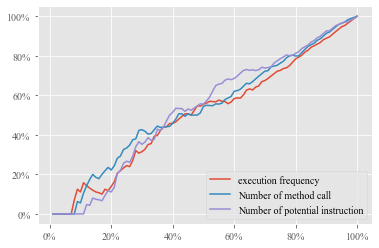

In [15]:
plt.style.use('ggplot')
plt.rc('font', family='Times New Roman')
fig, ax = plt.subplots()
ax.plot(np.linspace(0.01, 1.0, num=100), frequency_zookeeper, label="execution frequency", linestyle='-')
# ax.plot(np.linspace(0.01, 1.0, num=100), potential_method_call_zookeeper, label="potential_method_call", linestyle='-')
ax.plot(np.linspace(0.01, 1.0, num=100), method_call_zookeeper, label="Number of method call", linestyle='-')
ax.plot(np.linspace(0.01, 1.0, num=100), potential_instruction_zookeeper, label="Number of potential instruction", linestyle='-')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.legend(loc="lower right")
plt.show()

In [16]:
# Hadoop

In [17]:
project_hadoop = "Hadoop"
data_file_hadoop = project_hadoop+"ProfileStat.xlsx"

In [18]:
df_hadoop = pd.read_excel(data_file_hadoop, sheet_name='AverageCost')

In [19]:
target_result_hadoop = np.asarray([df_hadoop["Rank - MeanTime"]])
execution_frequency_result_hadoop = np.asarray([df_hadoop["Rank - Frequency"]])
method_calls_result_hadoop = np.asarray([df_hadoop["Rank - MethodCalls"]])
potential_method_calls_result_hadoop = np.asarray([df_hadoop["Rank - PotentialMethodCall"]])
potential_instructions_result_hadoop = np.asarray([df_hadoop["Rank - PotentialInstruction"]])

In [20]:
## Our result

In [21]:
print(spearmanr(df_hadoop["Rank - MeanTime"], df_hadoop["Rank - Frequency"]))
print(spearmanr(df_hadoop["Rank - MeanTime"], df_hadoop["Rank - MethodCalls"]))
print(spearmanr(df_hadoop["Rank - MeanTime"], df_hadoop["Rank - PotentialMethodCall"]))
print(spearmanr(df_hadoop["Rank - MeanTime"], df_hadoop["Rank - PotentialInstruction"]))

SpearmanrResult(correlation=-0.12958300639930073, pvalue=0.05962570074487643)
SpearmanrResult(correlation=0.22039363067432585, pvalue=0.0012387061665827528)
SpearmanrResult(correlation=0.0385494582445941, pvalue=0.5767230990990948)
SpearmanrResult(correlation=0.03572071794083827, pvalue=0.605022403590188)


In [22]:
i = 0.01
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

0.0
0.0
0.0
0.0


In [23]:
i = 0.05
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

0.0
0.0
0.1
0.1


In [24]:
i = 0.1
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

0.19047619047619047
0.0
0.09523809523809523
0.09523809523809523


In [25]:
i = 0.2
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
print(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

0.11904761904761904
0.11904761904761904
0.35714285714285715
0.35714285714285715


In [26]:
frequency_hadoop = []
method_call_hadoop = []
potential_method_call_hadoop = []
potential_instruction_hadoop = []
for i in np.linspace(0.01, 1.0, num=100):
    frequency_hadoop.append(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - Frequency"].to_list(), i))
    method_call_hadoop.append(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - MethodCalls"].to_list(), i))
    potential_method_call_hadoop.append(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialMethodCall"].to_list(), i))
    potential_instruction_hadoop.append(topK_precision(df_hadoop["Rank - MeanTime"].to_list(), df_hadoop["Rank - PotentialInstruction"].to_list(), i))

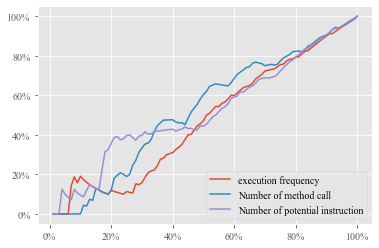

In [27]:
plt.style.use('ggplot')
plt.rc('font', family='Times New Roman')
fig, ax = plt.subplots()
ax.plot(np.linspace(0.01, 1.0, num=100), frequency_hadoop, label="execution frequency", linestyle='-')
# ax.plot(np.linspace(0.01, 1.0, num=100), potential_method_call_hadoop, label="potential method call", linestyle='-')
ax.plot(np.linspace(0.01, 1.0, num=100), method_call_hadoop, label="Number of method call", linestyle='-')
ax.plot(np.linspace(0.01, 1.0, num=100), potential_instruction_hadoop, label="Number of potential instruction", linestyle='-')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.legend(loc="lower right")
plt.show()

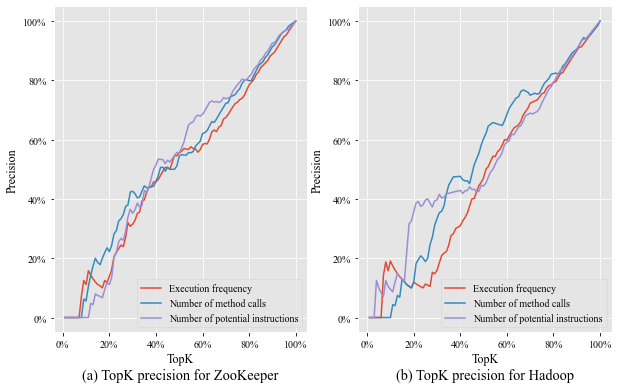

In [28]:
plt.style.use('ggplot')
plt.rc('font', family='Times New Roman')
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
# ZooKeeper
axs[0].plot(np.linspace(0.01, 1.0, num=100), frequency_zookeeper, label="Execution frequency", linestyle='-')
# ax.plot(np.linspace(0.01, 1.0, num=100), potential_method_call_zookeeper, label="potential_method_call", linestyle='-')
axs[0].plot(np.linspace(0.01, 1.0, num=100), method_call_zookeeper, label="Number of method calls", linestyle='-')
axs[0].plot(np.linspace(0.01, 1.0, num=100), potential_instruction_zookeeper, label="Number of potential instructions", linestyle='-')
axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
axs[0].legend(loc="lower right")
axs[0].set_xlabel("TopK", color='black')
axs[0].set_ylabel("Precision", color='black')
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].set_title('(a) TopK precision for ZooKeeper', y=-0.16)

# axs[0].legend(loc="lower right")
# Hadoop
axs[1].plot(np.linspace(0.01, 1.0, num=100), frequency_hadoop, label="Execution frequency", linestyle='-')
# ax.plot(np.linspace(0.01, 1.0, num=100), potential_method_call_hadoop, label="potential method call", linestyle='-')
axs[1].plot(np.linspace(0.01, 1.0, num=100), method_call_hadoop, label="Number of method calls", linestyle='-')
axs[1].plot(np.linspace(0.01, 1.0, num=100), potential_instruction_hadoop, label="Number of potential instructions", linestyle='-')
axs[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
axs[1].legend(loc="lower right")
axs[1].set_xlabel("TopK", color='black')
axs[1].set_ylabel("Precision", color='black')
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].set_title('(b) TopK precision for Hadoop', y=-0.16)

plt.savefig("E:/TopNPrecision.pdf",  bbox_inches='tight', dpi=300)
plt.show()